# Exercise 1: Supervised learning / Regression

## Learning outcomes:
 - Machine learning methods for regression
     - Linear regression
     - Non-linear regression
     - Multivariate regression
     - Neural networks
 - Model selection
 - Error / cost
 - Feature selection
 - (Data)
 - Machine learning open source tools:
     - Keras, SciKit-Learn, Jupyter Notebooks, Matplotlib

## Structure
1. Linear regression
    1. Manually fit a model to data
    2. Use iterative algorithm to learn a model
2. Non-linear regression
    1. Underfitting a model
    2. Overfitting a model
    3. Model selection
3. Multivariate regression
    1. 
4. Neural networks

## Dataset: Boston house price predicion

## Load Open Source Machine Learning Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pylab
%matplotlib inline

In [2]:
pylab.rcParams['figure.figsize'] = [12.0, 8.0]

## Load Keras, one of the most popular Open Source Deep Learning library

In [3]:
# Keras is an easy to use Deep Learning library for Python
import keras

from keras import backend as K

# Load Sequential model architecture
from keras.models import Sequential

# Load Dense and Dropout layers ?
from keras.layers import Dense, Dropout

# Load RMSprop optimizer to minimize cost to train the network
from keras.optimizers import RMSprop, SGD

Using TensorFlow backend.
/Users/tkin/wrk/analytics_weekly/ml-crash-course/mlenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Loading data

In [4]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

## Visualising data
It is a good idea to visualise the data before running any machine learning algorithms to see if the data makes any sense and if it is possible to learn from the data.

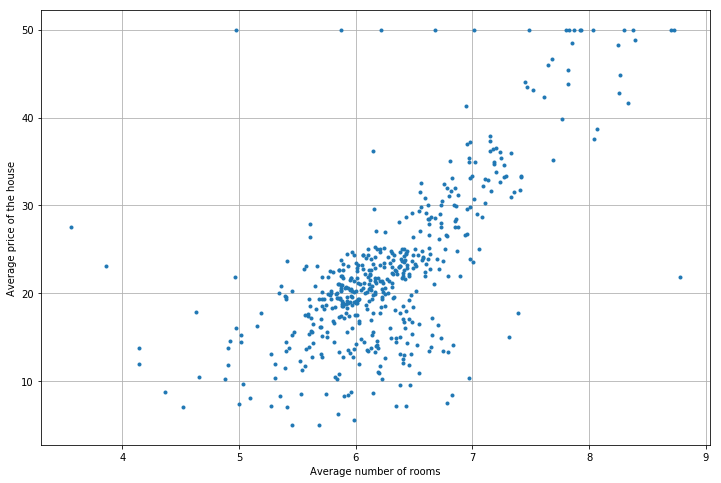

In [5]:
pylab.plot(X, y, '.')
pylab.grid()
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.savefig('house_num_rooms_vs_price.png')

## Exercise 1.1: Manually fitting a model

In [65]:
# Splits the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
# Our simple linear model
def predict(x, w, b):
    return w*x + b

In [67]:
# Init weight and bias
w = 1
b = 0

In [68]:
y_pred = predict(x_train, w, b)

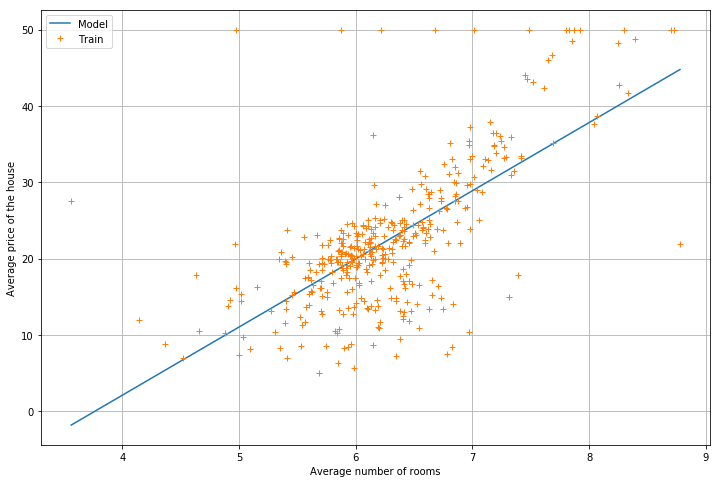

In [80]:
pylab.figure()
xs = np.linspace(X.min(), X.max(), 100)
pylab.plot(xs, predict(xs, w, b))
pylab.plot(x_train, y_train, '+')
#pylab.plot(x_test, y_test, '.')
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.legend(['Model', 'Train', 'Test'])
pylab.grid()

### Visualising error function
Error function shows how the weight *w* affects the error. Notice that we did not study bias term *b* in the sake of simplicity.

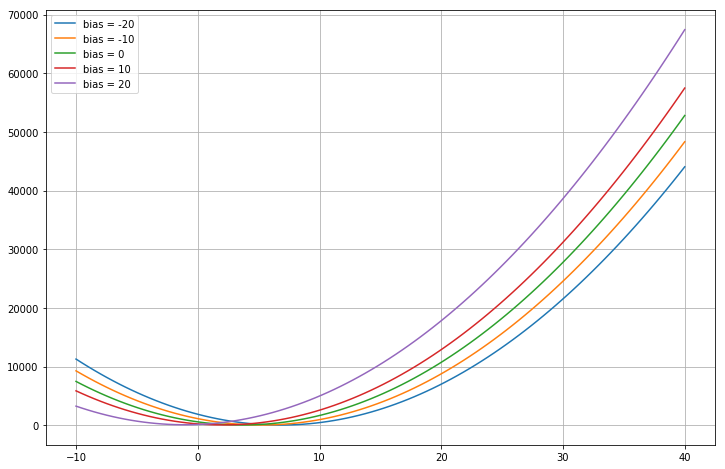

In [81]:
# Predict house prices with weights from 1 to 20 and bias = -10, 0, 10
ws = np.linspace(-10,40,100)
for b in [-20, -10, 0, 10, 30]:
    errs = []
    for w in ws:
        errs.append(mean_squared_error(y_train, predict(x_train, w, b)))
    # Visualise error function
    pylab.plot(ws, errs)
pylab.legend(['bias = -20', 'bias = -10', 'bias = 0', 'bias = 10', 'bias = 20'])
pylab.grid()

#  Linear regression (from SciKit-Learn)

## Train

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)

(404,)


In [75]:
clf = LinearRegression()

In [76]:
clf.fit(x_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
w = clf.coef_
b = clf.intercept_

## Evaluate model

In [27]:
train_error = mean_squared_error(y_train, clf.predict(x_train.reshape(-1,1)))
test_error = mean_squared_error(y_test, clf.predict(x_test.reshape(-1,1)))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=45.481883 test error=36.449761


### Visualise results

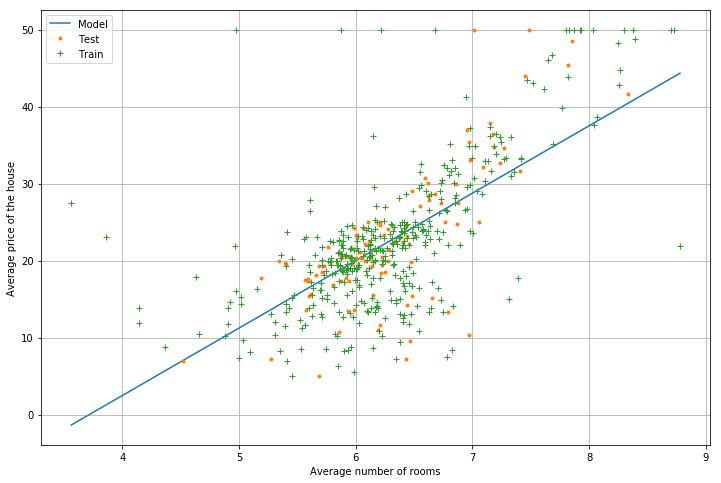

In [29]:
pylab.figure()

# Generate data to visualise model
xs = np.linspace(X.min(), X.max(), 100)

# Plot stuff
pylab.plot(xs, clf.predict(xs.reshape(-1, 1)))
pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')

# Configure figure axes etc
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.legend(['Model', 'Test', 'Train'])
pylab.grid()

# Linear regression with Keras

## Load data

In [135]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

print(X.shape)
print(y.shape)

(506,)
(506,)


## Define a model (Linear Regression)

In [158]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# In linear regression we don't have hidden layers. Just the output which is connected to input.
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Define loss/cost function and optimizer and compile network

In [164]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

## Train the model

In [165]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [166]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404,), (404,), (102,), (102,))

In [170]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=0)

## Evaluate the model

In [171]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=60.624535 test error=43.123560


### Visualise results

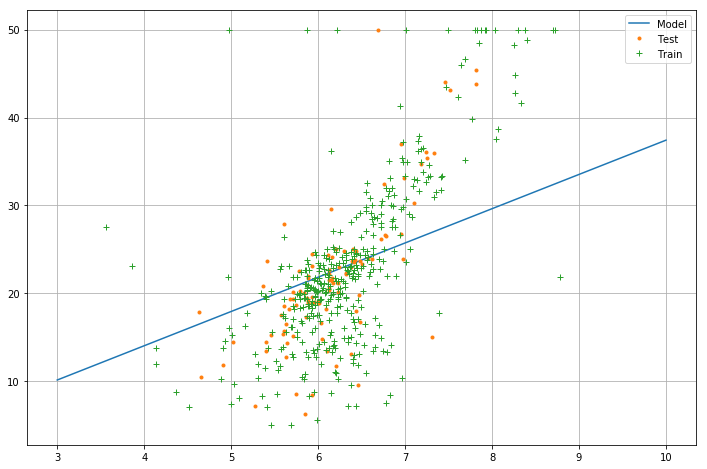

In [173]:
pylab.figure()
xs = np.linspace(3, 10, 20)
pylab.plot(xs, model.predict(xs.reshape(-1, 1)))
pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')
pylab.legend(['Model', 'Test', 'Train'])
pylab.grid()

# Exercise 1.2 Non-linear regression
Here we use non-linear functions to predict house prices instead of a linear function.

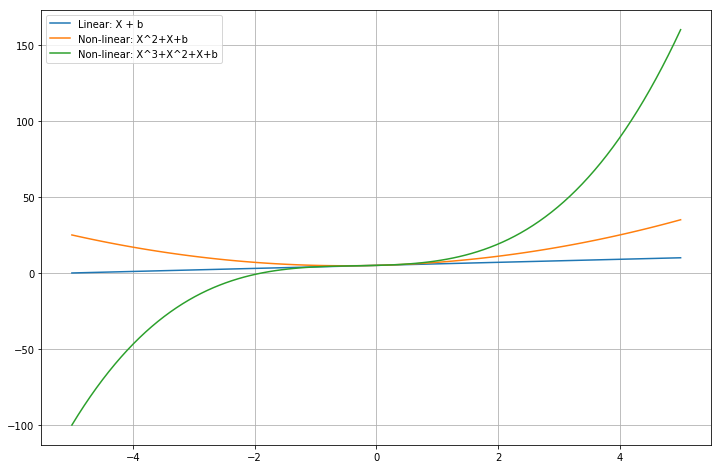

In [90]:
# Plotting linear and two non-linear functions
xs = np.linspace(-5,5,100)
bias = 5
y1 = xs + bias
y2 = np.power(xs, 2) + xs + bias
y3 = np.power(xs, 3) + np.power(xs, 2) + xs + bias

pylab.plot(xs, y1)
pylab.plot(xs, y2)
pylab.plot(xs, y3)
pylab.grid()
pylab.legend(['Linear: X + b', 'Non-linear: X^2+X+b', 'Non-linear: X^3+X^2+X+b'])

In [104]:
X.shape

(506,)

In [114]:
def gen_features(x, n=3):
    x_out = []
    for i in range(1, n+1):
        x_out.append(x.reshape(-1, 1)**i)
    
    return np.hstack(x_out)

#### Train models with X, X^2, and X^3

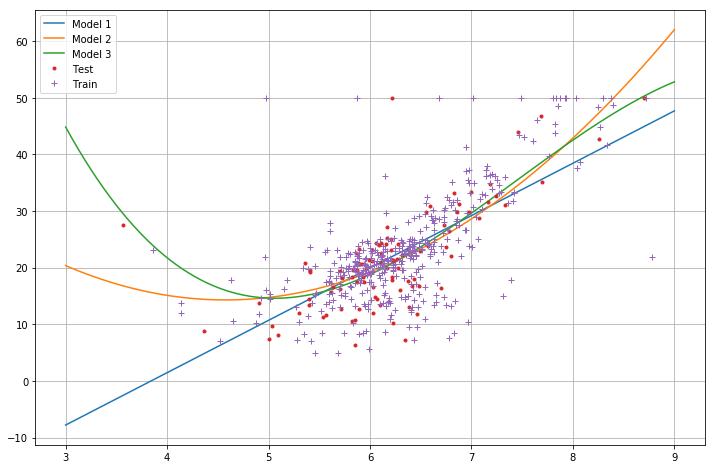

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for p in range(1, 4):
    # Gen data
    x_train_tmp = gen_features(x_train, p)
    x_test_tmp = gen_features(x_test, p)
    
    # Train a model
    clf.fit(x_train_tmp, y_train)
    
    # Plot
    xs = np.linspace(3,9,100).reshape(-1,1)
    xs = gen_features(xs, p)
    pred = clf.predict(xs)
    pylab.plot(np.linspace(3,9,100), pred)

pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')
pylab.legend(['Model 1', 'Model 2', 'Model 3', 'Test', 'Train'])
pylab.grid()

In [ ]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# In linear regression we don't have hidden layers. Just the output which is connected to input.
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=0)

In [ ]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_scaler.inverse_transform(y_test), y_scaler.transform(y_test_pred), '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()

# Exercise 1.3 Multivariate regression

### Load data

In [176]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data

# Target / desired output
y = boston.target

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(506, 13)
(506,)
(404, 13) (102, 13) (404,) (102,)


### Model with SciKit Learn

In [177]:
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

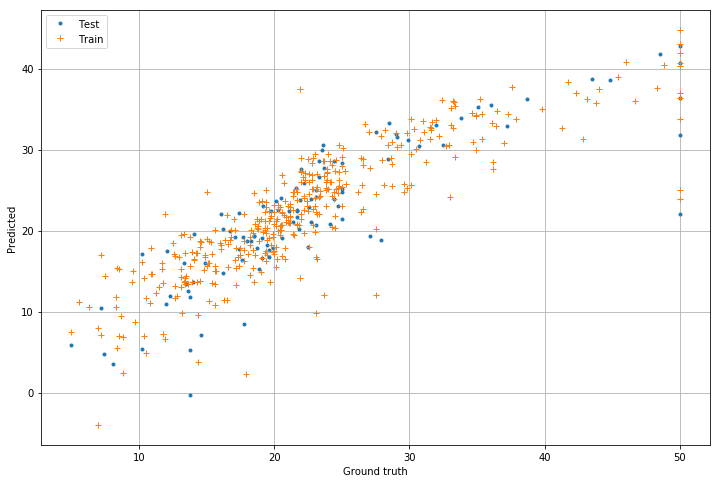

In [180]:
pylab.figure()
pylab.plot(y_test, clf.predict(x_test), '.')
pylab.plot(y_train, clf.predict(x_train), '+')
pylab.legend(['Test', 'Train'])
pylab.xlabel('Ground truth')
pylab.ylabel('Predicted')
pylab.grid()

### Keras model

In [181]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# Input layer connected a layer with 1 output nodes
model.add(Dense(1, activation='linear', input_shape=(X.shape[1],)))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [182]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=1000,
                    verbose=0)

In [183]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=43.941107 test error=45.443502


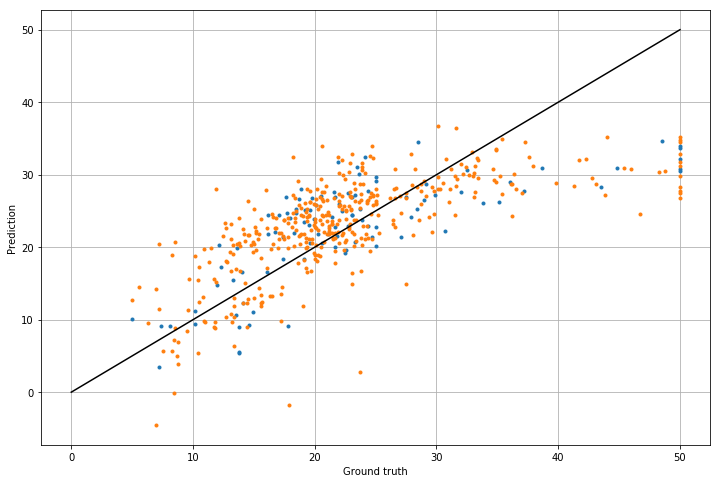

In [186]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_test, y_test_pred, '.')
y_train_pred = model.predict(x_train, verbose=0)
pylab.plot(y_train, y_train_pred, '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()

# Exercise 1.4 Neural network

## Load data

In [ ]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data

# Target / desired output
y = boston.target

print(X.shape)
print(y.shape)

## Process data

In [ ]:
x_scaler = MinMaxScaler().fit(X)
X = x_scaler.transform(X)
y_scaler = MinMaxScaler().fit(y.reshape(-1, 1))
y = y_scaler.transform(y.reshape(-1, 1))

## Define a model

In [ ]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# Input layer connected a layer with 2 nodes
model.add(Dense(2, activation='linear', input_shape=(X.shape[1],)))

model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

## Train a model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=1000,
                    verbose=0)

## Evaluate the model

In [ ]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

### Visualise

In [ ]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(y_test_pred), '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()